# Week 4 Hand-in

## Assignment



## Status


## Solution for ex 1

In [10]:
import numpy as np

filename = "../data/befkbhalderstatkode.csv"

ndArray = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

print(ndArray)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [65]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

dd = ndArray
mask = (dd[:,0] == 2015) # filter only rows that has value = 2015 in column 0

##print('sum area 1', np.sum(dd[(dd[:,0] == 2015) & (dd[:,1] == 3)][:,4]))

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

res = {}

for entry in neighb:
    res[neighb[entry]] = number_of_people_per_neighbourhood(entry, mask)
    
print(res)

{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

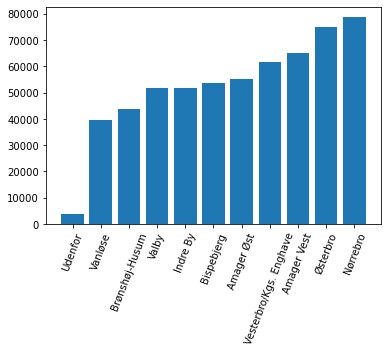

In [70]:
import matplotlib.pyplot as plt

sorted_res = sorted(res.items(), key=lambda kv: kv[1])
newdict = {}

for value in sorted_res:
    newdict[value[0]]=value[1]
    
plt.bar(newdict.keys(), newdict.values())

plt.xticks(rotation=69)

In [78]:
boo_mask = (dd[:,0] == 2015) & (dd[:,2] > 65)
print(sum(boo_mask))

2639


In [83]:
non_dk_mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,3] == (5120 or 5110 or 5104 or 5105 or 5106))
print(sum(non_dk_mask))

130


[62221, 62583, 63050, 63572, 64503, 65856, 66148, 66295, 66673, 66877, 67020, 67550, 67516, 67671, 67351, 67330, 67964, 68769, 69951, 70938, 72400, 73388, 74521, 75113]


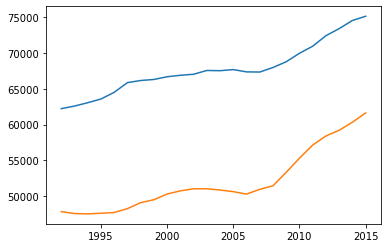

In [87]:
years = range(1992, 2016)
vesterbro = []
osterbro = []
for y in years:
    yearmask = (dd[:,0] == y)
    vesterbro.append(number_of_people_per_neighbourhood(2, yearmask))
    osterbro.append(number_of_people_per_neighbourhood(4, yearmask))
print(vesterbro)

plt.plot(years, vesterbro)
plt.plot(years, osterbro)